In [ ]:
import torch
import math
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class calculate():
  def __init__(self, learning_rate=1e-6, dimension=4, value_size = 2000):
    self.learning_rate = learning_rate
    self.dimension = dimension
    self.value_size = value_size
    self.dtype = torch.float64
    self.device = torch.device('cuda')
    self.running_count = 20000
    if self.device is None:
      self.device = torhc.deivce('cpu');print('------warning: using cpu---------')
    self.weight_array = [torch.randn((), device=self.device, dtype=self.dtype) for i in range(self.dimension)]
  
  def start_execute(self):
    value_x = torch.linspace(-math.pi, math.pi, self.value_size, device=self.device, dtype=self.dtype)
    self.value_x = value_x
    target_value = self.target_function(value_x)
    # import pdb; pdb.set_trace()
    for i in range(self.running_count):
      self.predict_value = self.predict_function(value_x)
      loss = (target_value - self.predict_value).pow(2).sum().item()
      delta_loss_pre = 2 * (self.predict_value - target_value)
      learning_rate = self.learning_rate
      for each_dim in range(self.dimension):
        learning_rate = learning_rate / (each_dim+1)
        self.weight_array[each_dim] -= (delta_loss_pre * learning_rate * value_x.pow(each_dim)).sum()

      if (i+1) % 2000 == 0:
        print('loss is %10s'%loss)

  def target_function(self, value_x):
      return torch.sin(value_x)
  
  def predict_function(self, value_x):
    value_y = [ self.weight_array[i] * value_x ** i for i in range(self.dimension) ]
    value_y = np.array(value_y).sum(axis=0)
    return value_y
    

In [ ]:
test_demo = calculate(learning_rate=1e-6,dimension=6, value_size=2000)
test_demo.start_execute()

loss is 4254.968608511621
loss is 2620.337936132467
loss is 1663.7917889961936
loss is 1070.1105157441189
loss is 692.207719239311
loss is 448.88071333732165
loss is 291.40882185213354
loss is 189.27309427763262
loss is 122.96443697874203
loss is 79.89750576762864


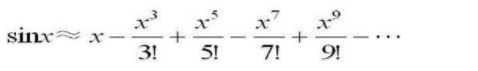

根据泰勒公式，本来是有机会进行高次拟合的，但是，每个权重的学习率可能由于是固定的，导致了3次拟合效果最好呢

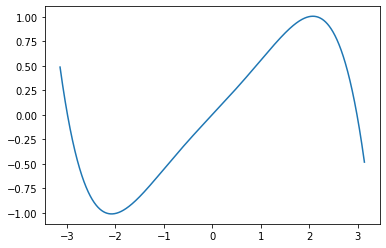

In [ ]:
plt.plot(test_demo.value_x.tolist(), test_demo.predict_value.tolist())

In [ ]:
test_demo.weight_array

[tensor(0.0022, device='cuda:0', dtype=torch.float64),
 tensor(0.5302, device='cuda:0', dtype=torch.float64),
 tensor(-0.0017, device='cuda:0', dtype=torch.float64),
 tensor(0.0354, device='cuda:0', dtype=torch.float64),
 tensor(0.0002, device='cuda:0', dtype=torch.float64),
 tensor(-0.0106, device='cuda:0', dtype=torch.float64)]